In [1]:
import time

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
import seaborn as sns
sns.set_style('darkgrid')
import os
for dirname, _, filenames in os.walk('/socialwe'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
# Text processing imports
!pip install contractions langid nltk==3.2.4

import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

import string
import contractions
import langid
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords, wordnet
from nltk.stem import WordNetLemmatizer

# Wordcloud imports
from wordcloud import WordCloud, STOPWORDS
from PIL import Image

# ML models
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.feature_extraction.text import TfidfVectorizer
import datetime

# Sentiment Analysis
!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

import collections

#stop words
from nltk.corpus import stopwords
stop=set(stopwords.words('english'))

#spacy
import spacy
spacy_nlp = spacy.load("en_core_web_md")
from contractions import contractions_dict


from nltk.tokenize.toktok import ToktokTokenizer

[nltk_data] Downloading package stopwords to
[nltk_data]     /home/parallels/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
df= pd.read_csv("Demo.csv",sep='\t')

In [3]:
print('There are {} rows and {} columns in dataset'.format(df.shape[0],df.shape[1]))

There are 1000 rows and 8 columns in dataset


In [4]:
df.head(10)

,Video URL,Nickname,User URL,Date,Text,Email from comment,Upvotes,Replies
0,https://www.youtube.com/watch?v=CXYGOpcNNSQ,G̷a̷c̷h̷a̷ ̷ ̷Y̷a̷g̷m̷u̷r̷,http://www.youtube.com/channel/UCpVpaHQepzA6N3...,2021-11-12T17:54:07Z,"I really missed Amber, finally she showed up! ^^",NaN,3821,23
1,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Napat Sahapat,http://www.youtube.com/channel/UClU6t2r_3P_pp1...,2021-11-16T04:24:27Z,Amber: “Do you want to build a snowman?”\nAlbe...,NaN,1966,4
2,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Sora Is My Name,http://www.youtube.com/channel/UCSX4ci9C_6F1ii...,2021-11-15T11:47:44Z,"""Dragonspine has become more dangerous than it...",NaN,3163,12
3,https://www.youtube.com/watch?v=CXYGOpcNNSQ,"Emil Clone #154,760",http://www.youtube.com/channel/UCyNKebz6HIDfdG...,2021-11-15T01:23:56Z,"Amber: ""Let's combine our forces and make ours...",NaN,2239,4
4,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Taylor Lindsey,http://www.youtube.com/channel/UCQe5kDRX0yo2Za...,2021-11-15T03:17:04Z,"Albedo is the Mariah Carey of Genshin, when wi...",NaN,475,3
5,https://www.youtube.com/watch?v=CXYGOpcNNSQ,qiqivx,http://www.youtube.com/channel/UCPPGXShzAwf1W5...,2021-11-12T19:26:34Z,Dragonspine: *freezing cold*\nAmber & Eula: Wh...,NaN,4776,25
6,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Venti,http://www.youtube.com/channel/UCty6Iy8f8bJ03t...,2021-11-14T16:05:13Z,Someone pointed out something very interesting...,NaN,783,20
7,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Tempolaris,http://www.youtube.com/channel/UCoURlz-jHUtFmP...,2021-11-26T00:38:16Z,"They did a good job hiding the fact that """"Alb...",NaN,123,1
8,https://www.youtube.com/watch?v=CXYGOpcNNSQ,⭕️ CLAIM FREE PRIMOGEMS CHECK MY CHANNEL ⭕️,http://www.youtube.com/channel/UCVnKluGQRFodaH...,2021-11-24T19:41:38Z,I hope there will be a festival event soon in ...,NaN,113,1
9,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Egg Dog,http://www.youtube.com/channel/UC88wbfKqcy2E2o...,2021-11-15T08:53:34Z,Me: Ignoring all the quests in dragonspine alr...,NaN,220,3


In [5]:
for c in df.columns:
    print(type(c[0]),c)

<class 'str'> Video URL
<class 'str'> Nickname
<class 'str'> User URL
<class 'str'> Date
<class 'str'> Text
<class 'str'> Email from comment
<class 'str'> Upvotes
<class 'str'> Replies


In [6]:
df=df.drop(['time','photo','channel','cid'],axis=1)

KeyError: "['time' 'photo' 'channel' 'cid'] not found in axis"

In [ ]:
df.info()

In [ ]:
repeats = df[df.groupby('Text')['Text'].transform('size') > 1]


print("number of repeats:", len(repeats))
print("percentage of repeats:",np.round(len(repeats)/len(df) * 100, 1), "%")

In [ ]:
repeats.head(40)

In [ ]:
# Remove URLS
df['processed'] = df['Text'].apply(lambda comment : re.sub(r"http\S+", "", comment))


# Remove numbers
df['processed'] = df['processed'].apply(lambda comment : re.sub(r"^\d+\s|\s\d+\s|\s\d+$", " ", comment))


# lower case
df['processed_lower'] = df['processed'].apply(lambda comment :comment.lower())

In [ ]:
pd.set_option('display.max_colwidth', None)
df.head(50)

In [ ]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

df["processed"]=df["processed"].map(remove_emoji)
    
df["processed_lower"]=df["processed_lower"].map(remove_emoji)   

In [ ]:
def remove_emoji2(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

In [ ]:
df.head(100)

In [ ]:
def create_corpus(column):
    corpus=[]  
    for x in column.str.split():
        for i in x:
            corpus.append(i)
    return corpus

corpus=create_corpus(df["processed"])
corpus_lower=create_corpus(df["processed_lower"])

dic = collections.defaultdict(int)
dic_lower = collections.defaultdict(int)

for word in corpus:
    if word in stop:
        dic[word]+=1
for word in corpus_lower:
    if word in stop:
        dic_lower[word]+=1
        
top=sorted(dic.items(), key=lambda x:x[1],reverse=True)[:10] 
top_lower=sorted(dic_lower.items(), key=lambda x:x[1],reverse=True)[:10] 

In [ ]:
x,y=zip(*top_lower)
x,y=zip(*top)
plt.bar(x,y)


In [ ]:
from collections import  Counter
counter=Counter(corpus_lower)
most=counter.most_common()
x=[]
y=[]
for word,count in most[:60]:
    if (word not in stop) :
        x.append(word)
        y.append(count)
sns.barplot(x=y,y=x)

In [7]:
def get_top_tweet_bigrams(corpus, n=None):
    vec = CountVectorizer(ngram_range=(1, 1)).fit(corpus)
    bag_of_words = vec.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]

In [8]:
plt.figure(figsize=(40,20))
top_bigrams=get_top_tweet_bigrams(df["processed_lower"])[:40]
x,y=map(list,zip(*top_bigrams))
sns.barplot(x=y,y=x)

KeyError: 'processed_lower'

<Figure size 2880x1440 with 0 Axes>

In [9]:
def expand_contractions(text, contraction_mapping=contractions_dict):
    contractions_pattern = re.compile('({})'.format(
        '|'.join(contraction_mapping.keys())), flags=re.IGNORECASE | re.DOTALL)

    def expand_match(contraction):
        match = contraction.group(0)
        first_char = match[0]
        try:
            expanded_contraction = contraction_mapping.get(match)\
                if contraction_mapping.get(match)\
                else contraction_mapping.get(match.lower())
            expanded_contraction = first_char+expanded_contraction[1:]
        except:
            pass
        return expanded_contraction
    expanded_text = contractions_pattern.sub(expand_match, text)
    expanded_text = re.sub("'", "", expanded_text)
    return expanded_text
tokenizer = ToktokTokenizer()
def remove_stopwords(text, is_lower_case=True, stopwords=stop):
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopwords]
    else:
        filtered_tokens = [
            token for token in tokens if token.lower() not in stopwords]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

def remove_special_characters(text, remove_digits=False):
    pattern = r'[^a-zA-z0-9\s]' if not remove_digits else r'[^a-zA-z\s]'
    text = re.sub(pattern, '', text)
    return text


def spacy_process(text):
    s=spacy_nlp(text)
    result_list=[]
    for element in s.ents:
        result_list.append((element.text,element.label_))
    return result_list

In [77]:
df["processed"]=[expand_contractions(i)if i !=" " else i for i in df["processed"]]
df["processed"]=[remove_stopwords(i)if i !=" " else i for i in df["processed"]]
df["processed"]=[remove_special_characters(i)if i !=" " else i for i in df["processed"]]
df["spacy_processed"] =[spacy_process(i) if i !=" " else i for i in df["processed"]]


df["processed_lower"]=[expand_contractions(i)if i !=" " else i for i in df["processed_lower"]]
df["processed_lower"]=[remove_stopwords(i)if i !=" " else i for i in df["processed_lower"]]
df["processed_lower"]=[remove_special_characters(i)if i !=" " else i for i in df["processed_lower"]]
df["spacy_processed_lower"] =[spacy_process(i) if i !=" " else i for i in df["processed_lower"]]

In [78]:
df.head(50)

,Video URL,Nickname,User URL,Date,Text,Email from comment,Upvotes,Replies,processed,processed_lower,spacy_processed,spacy_processed_lower
0,https://www.youtube.com/watch?v=CXYGOpcNNSQ,G̷a̷c̷h̷a̷ ̷ ̷Y̷a̷g̷m̷u̷r̷,http://www.youtube.com/channel/UCpVpaHQepzA6N3LJ3LW0JAQ,2021-11-12T17:54:07Z,"I really missed Amber, finally she showed up! ^^",NaN,3821,23,I really missed Amber finally showed ^^,really missed amber finally showed ^^,[],[]
1,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Napat Sahapat,http://www.youtube.com/channel/UClU6t2r_3P_pp1N4PKQZEPg,2021-11-16T04:24:27Z,Amber: “Do you want to build a snowman?”\nAlbedo: “Let it go.. The cold never bothered me anyway.”,NaN,1966,4,Amber Do want build snowman Albedo Let go The cold never bothered anyway,amber do want build snowman albedo let go cold never bothered anyway,"[(snowman Albedo , ORG)]",[]
2,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Sora Is My Name,http://www.youtube.com/channel/UCSX4ci9C_6F1iiORhrPtjEw,2021-11-15T11:47:44Z,"""Dragonspine has become more dangerous than it used to be""\nPlayer: *Remembering his dragonspine traumatic events\nPlayer: Oh hell nah",NaN,3163,12,Dragonspine become dangerous used Player Rehemehembering dragonspine traumatic events Player Oh hell nah,dragonspine become dangerous used player rehemehembering dragonspine traumatic events player oh hell nah,[],[]
3,https://www.youtube.com/watch?v=CXYGOpcNNSQ,"Emil Clone #154,760",http://www.youtube.com/channel/UCyNKebz6HIDfdGV5YUmVR5Q,2021-11-15T01:23:56Z,"Amber: ""Let's combine our forces and make ourselves a huge snowman!""\n\nKokomi to Gorou: ""Write that down WRITE THAT DOWN!""",NaN,2239,4,Amber Let us combine forces make huge snowman Kokomi Gorou Write WRITE THAT DOWN,amber let us combine forces make huge snowman kokomi gorou write write,[],[]
4,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Taylor Lindsey,http://www.youtube.com/channel/UCQe5kDRX0yo2Za9yyi94EEw,2021-11-15T03:17:04Z,"Albedo is the Mariah Carey of Genshin, when winter arrives he does",NaN,475,3,Albedo ah Carey Genshin winter arrives,albedo ah carey genshin winter arrives,"[(Albedo ah, PERSON), (Carey Genshin, PERSON), (winter, DATE)]","[(albedo ah carey genshin, PERSON), (winter, DATE)]"
5,https://www.youtube.com/watch?v=CXYGOpcNNSQ,qiqivx,http://www.youtube.com/channel/UCPPGXShzAwf1W5rp_CRcGkQ,2021-11-12T19:26:34Z,Dragonspine: *freezing cold*\nAmber & Eula: What a wonderful weather to wear shorts,NaN,4776,25,Dragonspine freezing cold Amber amp Eula What wonderful weather wear shorts,dragonspine freezing cold amber amp eula wonderful weather wear shorts,"[(Dragonspine, ORG), (Amber, ORG), (Eula, ORG)]","[(dragonspine, ORG)]"
6,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Venti,http://www.youtube.com/channel/UCty6Iy8f8bJ03tKQmdmcIgg,2021-11-14T16:05:13Z,"Someone pointed out something very interesting about “Albedo” in the trailer. If you pay attention, the ice attacks and symbols are all that of cryo whopperflowers, and we know that they can disguise themselves as things like plants or organic matter. And because it’s speculated that Albedo was created and not born, there’s a possibility that one of the regisvines traps the real Albedo in an avalanche, takes over his form or copies it, and then attacks us. *Why?* \nNo idea.\nBut it’s an interesting theory, because I highly doubt we’re fighting the real Albedo.",NaN,783,20,Someone pointed something interesting Albedo trailer If pay attention ice attacks symbols cryo whopperflowers know disguise thehemselves things like plants organic matter And speculated Albedo created born possibility one regisvines traps real Albedo avalanche takes form copies attacks us Why No idea But interesting theory I highly doubt fighting real Albedo,someone pointed something interesting albedo trailer pay attention ice attacks symbols cryo whopperflowers know disguise thehemselves things like plants organic matter speculated albedo created born possibility one regisvines traps real albedo avalanche takes form c

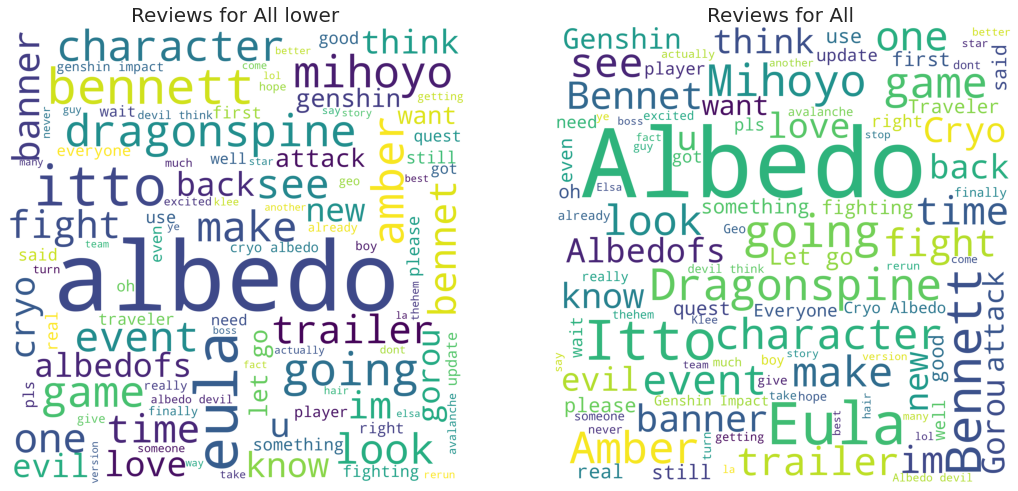

In [79]:
mlreview = ' '.join([text for text in df["processed_lower"]])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for All lower', fontsize = 20)

pyreview = ' '.join([text for text in df["processed"]])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for All ', fontsize = 20)

plt.show()

In [80]:
#ner character
#make word cloud per character

## NER by StanfordNLP

In [81]:
!pip install stanza


In [82]:
from ipywidgets import IntProgress
import stanza
import pickle

stanza.download('en', processors='tokenize,ner')
nlp_stanza = stanza.Pipeline(lang='en', processors='tokenize,ner')

2021-12-17 17:25:47 INFO: Downloading these customized packages for language: en (English)...
| Processor       | Package   |
-------------------------------
| tokenize        | combined  |
| ner             | ontonotes |
| forward_charlm  | 1billion  |
| backward_charlm | 1billion  |

2021-12-17 17:25:47 INFO: File exists: /home/parallels/stanza_resources/en/tokenize/combined.pt.
2021-12-17 17:25:48 INFO: File exists: /home/parallels/stanza_resources/en/ner/ontonotes.pt.
2021-12-17 17:25:48 INFO: File exists: /home/parallels/stanza_resources/en/forward_charlm/1billion.pt.
2021-12-17 17:25:48 INFO: File exists: /home/parallels/stanza_resources/en/backward_charlm/1billion.pt.
2021-12-17 17:25:48 INFO: Finished downloading models and saved to /home/parallels/stanza_resources.
2021-12-17 17:25:48 INFO: Loading these models for language: en (English):
| Processor | Package   |
-------------------------
| tokenize  | combined  |
| ner       | ontonotes |

2021-12-17 17:25:48 INFO: Use devic

In [83]:
def find_entity(s, ent_type='PERSON'):
    "Finds entity from the string"
    entities = nlp_stanza(s).ents
    people = set(list(map(lambda e: e.text if e.type==ent_type else '', entities)))-{''}
    return people

In [84]:
## Getting the Character
character_dic = collections.defaultdict(int)

for ent_type in ['PERSON', 'ORG', 'LOC']:
    ent_type_list = list(map(lambda x: find_entity(x, ent_type=ent_type), df["processed"]))
    #ent_type_list_spacy = list(map(lambda x: find_character(x, ent_type=ent_type), df["processed"]))
    df[ent_type] = [i for i in ent_type_list]
    #df[ent_type+"_s"] = [i for i in ent_type_list_spacy]
    for row in ent_type_list:
        for c in row:
            character_dic[c] +=1 

In [85]:
from functools import reduce
person_pmf = Counter(reduce(lambda a,b : a+b,list(map(lambda x: list(x), df['PERSON']))))
org_pmf = Counter(reduce(lambda a,b : a+b,list(map(lambda x: list(x), df['ORG']))))
loc_pmf = Counter(reduce(lambda a,b : a+b,list(map(lambda x: list(x), df['LOC']))))

print('Person Frequency', '\n', person_pmf)
print('Organization Frequency', '\n', org_pmf)
print('Location Frequency', '\n', loc_pmf)

Person Frequency 
 Counter({'Albedo': 146, 'Bennett': 23, 'Eula': 16, 'Mihoyo': 15, 'Bennet': 10, 'Amber': 9, 'Albedofs': 9, 'Itto': 9, 'Cryo Albedo': 7, 'Genshin': 7, 'Rosaria': 7, 'Klee': 6, 'Albedo Eula': 6, 'Dragonspine': 6, 'Arataki Itto': 6, 'Ittofs': 5, 'Mondstadt': 5, 'Elsa': 5, 'Gorou': 4, 'Arataki': 4, 'Liben': 4, 'Mondstadt Albedo': 3, 'Eula   Albedo': 3, 'Kokomi': 3, 'Childe': 3, 'Cryo': 3, 'Also Albedo': 3, 'Kokomi Gorou': 2, 'Signora': 2, 'Genshin Impact': 2, 'Arataki Ittofs': 2, 'Monstadt': 2, 'Barbara': 2, 'Gorou  Itto': 2, 'Benny': 2, 'Albedo fav': 2, 'Eula  Albedo': 2, 'Dull Blade': 2, 'Eula Albedo': 2, 'Beidou': 2, 'Hu Tao': 2, 'Bennetts': 2, 'eula': 2, 'Frozen': 2, 'Zhongli': 2, 'Misty': 2, 'Paimon': 2, 'Timmy': 2, 'Anna': 2, 'Kazuha': 2, 'Albedos': 2, 'Albedo  Let': 1, 'Carey Genshin': 1, 'Mihoyo  Dragonspine': 1, 'Eula   Albedo  devil': 1, 'Cryo Albedo Albedo': 1, 'Albedo    VENGEANCE': 1, 'Eula    Albedo': 1, 'Amber main  Amber': 1, 'Amber Eula': 1, 'Albedo  Loud

In [86]:
df[df['processed_lower'].str.contains('')]

,Video URL,Nickname,User URL,Date,Text,Email from comment,Upvotes,Replies,processed,processed_lower,spacy_processed,spacy_processed_lower,PERSON,ORG,LOC
0,https://www.youtube.com/watch?v=CXYGOpcNNSQ,G̷a̷c̷h̷a̷ ̷ ̷Y̷a̷g̷m̷u̷r̷,http://www.youtube.com/channel/UCpVpaHQepzA6N3LJ3LW0JAQ,2021-11-12T17:54:07Z,"I really missed Amber, finally she showed up! ^^",NaN,3821,23,I really missed Amber finally showed ^^,really missed amber finally showed ^^,[],[],{Amber},{},{}
1,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Napat Sahapat,http://www.youtube.com/channel/UClU6t2r_3P_pp1N4PKQZEPg,2021-11-16T04:24:27Z,Amber: “Do you want to build a snowman?”\nAlbedo: “Let it go.. The cold never bothered me anyway.”,NaN,1966,4,Amber Do want build snowman Albedo Let go The cold never bothered anyway,amber do want build snowman albedo let go cold never bothered anyway,"[(snowman Albedo , ORG)]",[],"{Albedo Let, Amber}",{},{}
2,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Sora Is My Name,http://www.youtube.com/channel/UCSX4ci9C_6F1iiORhrPtjEw,2021-11-15T11:47:44Z,"""Dragonspine has become more dangerous than it used to be""\nPlayer: *Remembering his dragonspine traumatic events\nPlayer: Oh hell nah",NaN,3163,12,Dragonspine become dangerous used Player Rehemehembering dragonspine traumatic events Player Oh hell nah,dragonspine become dangerous used player rehemehembering dragonspine traumatic events player oh hell nah,[],[],{},{},{}
3,https://www.youtube.com/watch?v=CXYGOpcNNSQ,"Emil Clone #154,760",http://www.youtube.com/channel/UCyNKebz6HIDfdGV5YUmVR5Q,2021-11-15T01:23:56Z,"Amber: ""Let's combine our forces and make ourselves a huge snowman!""\n\nKokomi to Gorou: ""Write that down WRITE THAT DOWN!""",NaN,2239,4,Amber Let us combine forces make huge snowman Kokomi Gorou Write WRITE THAT DOWN,amber let us combine forces make huge snowman kokomi gorou write write,[],[],{Kokomi Gorou},{},{}
4,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Taylor Lindsey,http://www.youtube.com/channel/UCQe5kDRX0yo2Za9yyi94EEw,2021-11-15T03:17:04Z,"Albedo is the Mariah Carey of Genshin, when winter arrives he does",NaN,475,3,Albedo ah Carey Genshin winter arrives,albedo ah carey genshin winter arrives,"[(Albedo ah, PERSON), (Carey Genshin, PERSON), (winter, DATE)]","[(albedo ah carey genshin, PERSON), (winter, DATE)]","{Carey Genshin, Albedo}",{},{}
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,https://www.youtube.com/watch?v=CXYGOpcNNSQ,S̷k̷y̷ ̷B̷l̷u̷e̷,http://www.youtube.com/channel/UCDo7APp7PxLq7vwjsm1DTJw,2021-11-17T07:41:40Z,Game Terberat Bukan Terbaik.,NaN,0,0,Game Terberat Bukan Terbaik,game terberat bukan terbaik,[],[],{Bukan Terbaik},{},{}
996,https://www.youtube.com/watch?v=CXYGOpcNNSQ,KraShant,http://www.youtube.com/channel/UCWv_90yg4Lmpc-qVQI8udCQ,2021-11-12T13:32:19Z,"""SHUT UP! WOULD'JA!!""\n\nMy favorite line from now",NaN,262,2,SHUT UP WOULDJA My favorite line,shut wouldja favorite line,[],[],{},{},{}
997,https://www.youtube.com/watch?v=CXYGOpcNNSQ,Sun Flower,http://www.youtube.com/channel/UCs0caPLB1fTPqqby9K6oK9A,2021-11-16T09:50:53Z,I think I've found the second Elsa,NaN,0,0,I think I found second Elsa,think found second elsa,"[(second, ORDINAL), (Elsa, PERSON)]","[(second, ORDINAL)]",{Elsa},{},{}
998,https://www.youtube.com/watch?v=CXYGOpcNNSQ,LxcxntrxpxaCxrvxs,http://www.youtube.com/channel/UCMHIOXTCtxFxKiifejooasg,2021-11-16T12:17:41Z,🇧🇷,NaN,0,0,,,[],[],{},{},{}


In [87]:
file = open('pmf.pkl','wb')
pickle.dump(person_pmf, file)
pickle.dump(org_pmf, file)
pickle.dump(loc_pmf, file)
file.close()

In [88]:
print(character_dic)

defaultdict(<class 'int'>, {'Amber': 9, 'Albedo  Let': 1, 'Kokomi Gorou': 2, 'Carey Genshin': 1, 'Albedo': 147, 'Mihoyo  Dragonspine': 1, 'Albedofs': 9, 'Bennett': 23, 'Eula   Albedo  devil': 1, 'Eula': 16, 'Cryo Albedo Albedo': 1, 'Cryo Albedo': 7, 'Mondstadt Albedo': 3, 'Gorou': 4, 'Ittofs': 5, 'Genshin': 7, 'Albedo    VENGEANCE': 1, 'Eula    Albedo': 1, 'Itto': 9, 'Signora': 2, 'Genshin Impact': 2, 'Amber main  Amber': 1, 'Amber Eula': 1, 'Albedo  Loud': 1, 'Mihoyo': 15, 'Timmie': 1, 'Me Klee': 1, 'Jean': 1, 'Elsa   Eula': 1, 'Albedo Klee': 1, 'Inazuma Mihoyo': 1, 'Geo Flowers': 1, 'Klee': 6, 'Natsu': 1, 'Green': 1, 'Eula  Dragonspine': 1, 'Albedo Albedo': 1, 'Mondstadt': 5, 'Itto  Yes  Kazuhas': 1, 'Sara': 1, 'Bennet': 10, 'Albedo Eula': 6, 'Arataki Ittofs': 2, 'Mihoyos': 1, 'Scarlet  Silver': 1, 'Monstadt': 2, 'Monk': 1, 'RERUN Mihoyo': 1, 'Alchehemist Teyvat': 1, 'Arataki': 4, 'Eula   Albedo': 3, 'Rosaria': 7, 'Barbara': 2, 'Kokomi': 3, 'Noelle': 1, 'Albedo  Itto': 1, 'Evil Albed

Albedo 147
Bennett 23
Eula 16
Mihoyo 15
Bennet 10
Amber 9
Albedofs 9
Itto 9
Cryo Albedo 7
Genshin 7
Rosaria 7
Klee 6
Albedo Eula 6
Dragonspine 6
Arataki Itto 6
Ittofs 5
Mondstadt 5
Elsa 5
Gorou 4
Arataki 4
Liben 4
Mondstadt Albedo 3
Eula   Albedo 3
Kokomi 3
Childe 3
Cryo 3
Also Albedo 3
Kokomi Gorou 2
Signora 2
Genshin Impact 2
Arataki Ittofs 2
Monstadt 2
Barbara 2
Gorou  Itto 2
Benny 2
Albedo fav 2
Eula  Albedo 2
Dull Blade 2
Eula Albedo 2
Beidou 2
Hu Tao 2
Bennetts 2
eula 2
Frozen 2
Zhongli 2
Misty 2
Paimon 2
Timmy 2
Anna 2
Kazuha 2
Albedos 2
Albedo  Let 1
Carey Genshin 1
Mihoyo  Dragonspine 1
Eula   Albedo  devil 1
Cryo Albedo Albedo 1
Albedo    VENGEANCE 1
Eula    Albedo 1
Amber main  Amber 1
Amber Eula 1
Albedo  Loud 1
Timmie 1
Me Klee 1
Jean 1
Elsa   Eula 1
Albedo Klee 1
Inazuma Mihoyo 1
Geo Flowers 1
Natsu 1
Green 1
Eula  Dragonspine 1
Albedo Albedo 1
Itto  Yes  Kazuhas 1
Sara 1
Mihoyos 1
Scarlet  Silver 1
Monk 1
RERUN Mihoyo 1
Alchehemist Teyvat 1
Noelle 1
Albedo  Itto 1
Evil A

<AxesSubplot:>

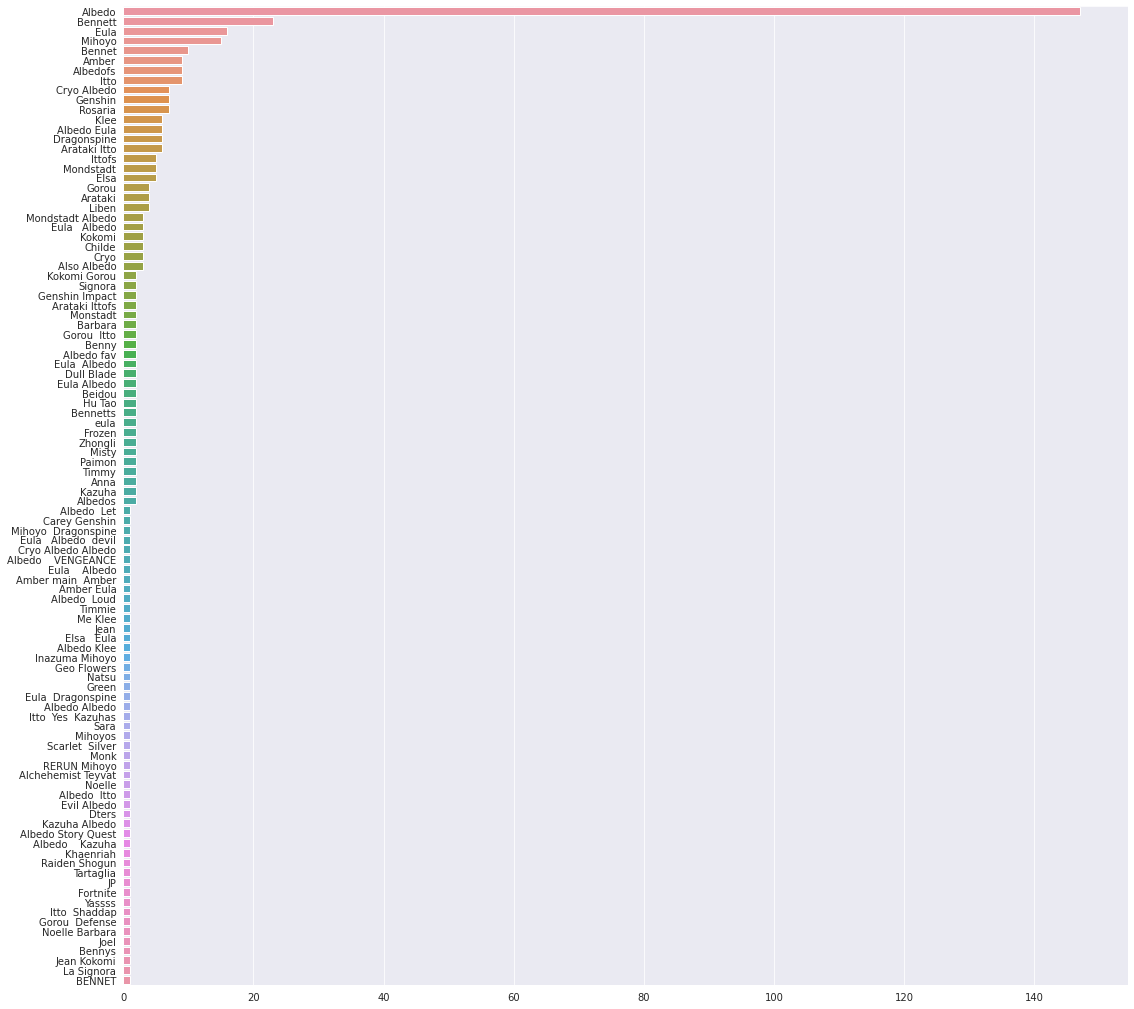

In [89]:
from collections import  Counter
counter=Counter(character_dic)
most=counter.most_common()
x=[]
y=[]
for word,count in most[0:100]:
    print(word,count)
    x.append(word)
    y.append(count)


sns.barplot(x=y,y=x)


In [ ]:
def contain(text):
    if 'Albedo' in text:
        return True
    return False
Albedo_Comment = df[df['PERSON'].apply(contain)]



        

In [ ]:
Albedo_Comment["processed"]

In [ ]:
mlreview = ' '.join([text for text in df["processed"]])
plt.rcParams['figure.figsize'] = (18, 18)

plt.subplot(1, 2, 1)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words = 100).generate(mlreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for All comment', fontsize = 20)

pyreview = ' '.join([text for text in Albedo_Comment["processed"]])

plt.subplot(1, 2, 2)
wordcloud = WordCloud(background_color = 'white',width = 2000, height = 2000, max_words =10).generate(pyreview)
plt.imshow(wordcloud)
plt.axis('off')
plt.title('Reviews for Alebdo ', fontsize = 20)

plt.show()

In [ ]:
#